# Figure 2, Metric examples

In [12]:
import os
import sys
import re
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import tools as tl
from coralModel import Reef, Organism, Ocean
import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

type_dictionary = {'coral':0, 'turf':1, 'macroalgae':2}

In [13]:
##### Style setup
sns.set_style("ticks")
colors =['#EE8382', '#508991', '#172A3A']
success_palette = sns.set_palette(sns.color_palette(colors))

levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')


##### Functions

## For plots
class HandlerSquare(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = xdescent + 0.5 * (width - height), ydescent
        p = mpatches.Rectangle(xy=center, width=height,
                               height=height, angle=0.0)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p] 

## For pulling/processing image info in pandas df to plotable matrix
def prep_image(df, simulation, time):    
    image = df[(df['time']==time)&(df['simulation']==simulation)]['image']
    image = np.genfromtxt([image.values[0].replace('[', '').replace(']', '')])
    image = np.reshape(image, (25,25))
    return(image)
 
def density_from_image(image):
    
    Moorea = Reef()
    count=0
    for i in range(0, number_of_rows):
        for j in range(0, number_of_columns):
            
            node = Organism(type=image[i,j], 
                            location=[i,j], 
                            ID=count)
            Moorea.append(node)
            count = count + 1
    Moorea.generate_graph(1.45)
    densities = np.array([Moorea.nodes[n].neighbors[0] for n,val in enumerate(Moorea.nodes)])
    values = [Moorea.nodes[n].type for n,val in enumerate(Moorea.nodes)]
    return(values, densities)

In [14]:
path = './figures/paper/2_metric_examples/'
extension = '.png'

## Example Timeseries

In [15]:
top_directory = "./output/" #os.getcwd()
files, runs = tl.view_runs(top_directory)
number_of_rows = 25
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['number_of_rows']==number_of_rows)&
              (runs['grazing']==57)&
              (runs['grid_option']==0)&
              (runs['initial_coral_percent']==33)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
0,25,25,0,57,145,33,33,10,40,20,75,1100,10,10,0


In [22]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)
dt=.1
df['time'] = df['timestep']*dt
df['C'] = round(df.coral_percent/100,2)
df['T'] = round(df.turf_percent/100,2)
df['M'] = round(df.macroalgae_percent/100,2)

In [23]:
df[['time','timestep']]

,time,timestep
0,0.0,0
1,1.0,10
2,2.0,20
3,3.0,30
4,4.0,40
...,...,...
1095,105.0,1050
1096,106.0,1060
1097,107.0,1070
1098,108.0,1080


In [24]:
simulation = 6

_______

## Short Version

_______

In [49]:
figsize = (8,2)
times = [0,30,60,90]
top = .75

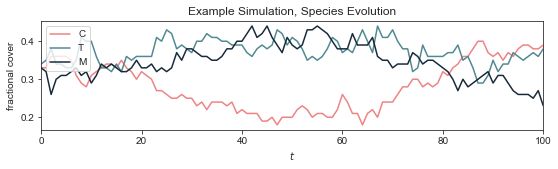

In [50]:
### create df with columns of interest
name = 'temporal_evolution_3_species'

time_final = 100
columns =['C', 'T', 'M']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)].set_index('time')[columns]
data.plot(figsize=(9,2))
plt.title('Example Simulation, Species Evolution')
plt.xlabel(r"$t$")
plt.ylabel('fractional cover')
plt.legend(loc='upper left')

plt.savefig(path + name + extension, dpi=600, bbox_inches = "tight")

In [51]:
columns =['coral_percent', 'turf_percent', 'macroalgae_percent','time','simulation', 'image', 'coral_coral_neighbors']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)][columns]

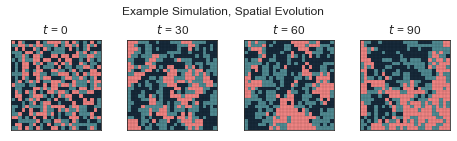

In [52]:
name = 'spatial_evolution_images'
colors =['#EE8382', '#508991', '#172A3A']
success_palette = sns.set_palette(sns.color_palette(colors))

levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

fig, ax = plt.subplots(1, len(times), figsize=figsize) 

for index in range(0, len(times)):
    
    image = prep_image(data,simulation,times[index])
    
    ax[index].imshow(image, cmap=cmap, norm=norm)
    ax[index].set_title(r'$t$ = ' + str(int(times[index])))

    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)
    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=top)
plt.suptitle('Example Simulation, Spatial Evolution')
plt.savefig(path + name + extension, dpi=400)

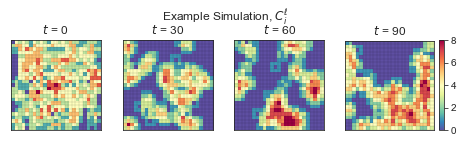

In [79]:
cmap = plt.cm.get_cmap('Spectral_r')

name = 'coral_neighbors_images'

number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(times), figsize=figsize, gridspec_kw={'width_ratios': [1,1,1,1.2]}) 

for index in range(0, len(times)):
    
    image = prep_image(data,simulation,times[index])    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    ax[index].imshow(image, cmap=cmap)
    ax[index].set_title(r'$t$'+' = ' + str(int(times[index])))
    #ax[index].axes.xaxis.set_visible(False)
    #ax[index].axes.yaxis.set_visible(False)
    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)

fig_legend = plt.imshow(image, cmap=cmap)
plt.colorbar(fig_legend)


    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=top)
plt.suptitle('Example Simulation, $C_i^\ell$')

plt.savefig(path + name + extension, dpi=400)

/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


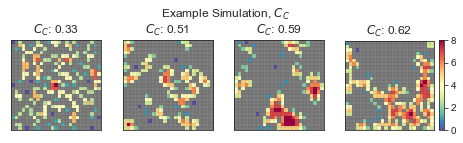

In [81]:
name = 'masked_images'

number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(times), figsize=figsize, gridspec_kw={'width_ratios': [1,1,1,1.2]}) 

for index in range(0, len(times)):
    
    time=times[index]
    
    image = prep_image(data,simulation,time)
    image_binary = np.nan_to_num(image/image)
    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    image_nan = image/(1-image_binary)
    masked_array = np.ma.array(image_nan, mask=np.isnan(image_nan))
    
    cmap.set_bad('gray',1.)

    ax[index].imshow(masked_array, cmap=cmap)
    ax[index].set_title(r'$C_C$: ' + 
                         str(round((data[(data['time']==time)&
                                  (data['simulation']==simulation)]['coral_coral_neighbors'].values[0]),2)))
    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)
    
fig_legend = plt.imshow(masked_array, cmap=cmap)
plt.colorbar(fig_legend)
    
plt.suptitle('Example Simulation, $C_C$')
fig.subplots_adjust(wspace=0.2, top=top)
plt.savefig(path + name + extension, dpi=400)

___
### Longer Version
___

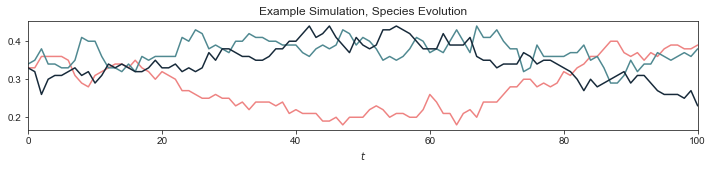

In [24]:
### create df with columns of interest
name = 'temporal_evolution_3_species'

time_final = 100
timesteps=[]
columns =['C', 'T', 'M']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)].set_index('time')[columns]
data.plot(figsize=(12,2), legend=False)
plt.title('Example Simulation, Species Evolution')
plt.xlabel(r"$t$")
plt.savefig(path + name + extension, dpi=400)

In [27]:
columns =['coral_percent', 'turf_percent', 'macroalgae_percent','time','simulation', 'image', 'coral_coral_neighbors']
data = df[(df['simulation']==simulation)&(df['time']<=time_final)][columns]

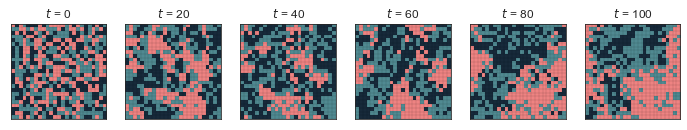

In [40]:
name = 'spatial_evolution_images'

timesteps = [0,20,40,60,80,100]

fig, ax = plt.subplots(1, len(timesteps), figsize=(12,3)) 

for index in range(0, len(timesteps)):
    
    image = prep_image(data,simulation,timesteps[index])
    
    ax[index].imshow(image, cmap=cmap, norm=norm)
    ax[index].set_title(r'$t$ = ' + str(int(timesteps[index])))

    
    ax[index].set_yticks([])
    ax[index].set_xticks([])
    ax[index].set_xticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, number_of_rows, 1), minor=True)
    ax[index].set_frame_on(False)
    ax[index].grid(color='black', linestyle='-', linewidth=.1, which='minor')
    ax[index].tick_params(which='minor',top=[], left=[],right=[], bottom=[])
    ax[index].set_frame_on(True)
    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=.75)
plt.savefig(path + name + extension, dpi=400)

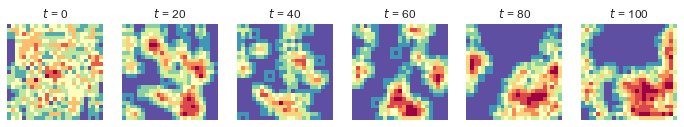

In [12]:
cmap = plt.cm.get_cmap('Spectral_r')

name = 'coral_neighbors_images'

timesteps = [0, 20,40,60,80,100]
number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(timesteps), figsize=(12,3)) 

for index in range(0, len(timesteps)):
    
    image = prep_image(data,simulation,timesteps[index])    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    ax[index].imshow(image, cmap=cmap)
    ax[index].set_title(r'$t$'+' = ' + str(int(timesteps[index])))
    ax[index].axes.xaxis.set_visible(False)
    ax[index].axes.yaxis.set_visible(False)
    ax[index].set_frame_on(False)
    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=.75)
plt.savefig(path + name + extension, dpi=400)

/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/rosannaneuhausler/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


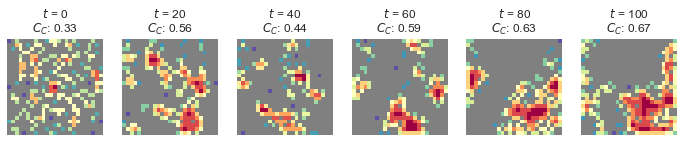

In [13]:
name = 'masked_images'

times = [0, 20,40,60,80,100]
number_of_columns, number_of_rows = 25, 25
fig, ax = plt.subplots(1, len(timesteps), figsize=(12,4)) 

for index in range(0, len(times)):
    
    time=times[index]
    
    image = prep_image(data,simulation,time)
    image_binary = np.nan_to_num(image/image)
    
    values, densities=density_from_image(image)
    image = np.reshape(densities, (number_of_columns, number_of_rows))
    
    image_nan = image/(1-image_binary)
    masked_array = np.ma.array(image_nan, mask=np.isnan(image_nan))
    
    cmap.set_bad('gray',1.)

    ax[index].imshow(masked_array, cmap=cmap)
    ax[index].set_title(r'$t$ = ' + str(int(time)) + '\n'+  r'$C_C$: ' + 
                         str(round((data[(data['time']==time)&
                                  (data['simulation']==simulation)]['coral_coral_neighbors'].values[0]),2)))
    ax[index].axes.xaxis.set_visible(False)
    ax[index].axes.yaxis.set_visible(False)
    ax[index].set_frame_on(False)
    ax[index].set_xlabel('neighbors: \n' + 'coral_coral: ' + 
                         str(data[(data['time']==time)&
                                  (data['simulation']==simulation)]['coral_coral_neighbors']))
    
#fig.suptitle(title)
fig.subplots_adjust(wspace=0.2, top=.75)
plt.savefig(path + name + extension, dpi=400)

____

## Not used in final plot

------

# For pseudo simulation / generate reef

In [72]:
## Functions

def create_reef(simulation):
    
    Moorea = Reef()
    count = 0
    
    if grid_option == 0:
        
        random.seed(simulation)
        grid = [(i,j)
                for i in range(0, number_of_columns) 
                for j in range(0, number_of_rows)]
        random.shuffle(grid)
        coral_count = round(number_of_nodes*coral_percent)
        macro_count = round(number_of_nodes*macroalgae_percent)
        locations = {'coral': grid[0:coral_count],
                     'macro': grid[coral_count: coral_count + macro_count]}
    
    for i in range(0, number_of_rows):
        
        for j in range(0, number_of_columns):

            if grid_option == 0:  
                if (i,j) in locations['coral']:
                    U = 0
                elif (i,j) in locations['macro']:
                    U = 2
                else:
                    U = 1    
            node = Organism(type=U, location=[i,j], ID=count)
            Moorea.append(node)
            count = count + 1
    return(Moorea)

In [73]:
grid_option = 0
number_of_columns, number_of_rows = 15, 15
number_of_nodes = number_of_columns * number_of_rows
coral_percent = float(40)/100
macroalgae_percent = float(30)/100
turf_percent = round(1 - coral_percent - macroalgae_percent, 2)
neighborhood_threshold = 1.45

In [74]:
seed=12
Moorea = create_reef(seed)
Moorea.generate_graph(neighborhood_threshold)

densities = np.array([Moorea.nodes[n].neighbors[0] for n,val in enumerate(Moorea.nodes)])
values = [Moorea.nodes[n].type for n,val in enumerate(Moorea.nodes)]

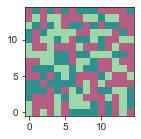

In [75]:
name = 'generated_example_grid'

plt.figure(figsize=(2,2))
plt.imshow(np.reshape(values, (number_of_columns, number_of_rows)), cmap=cmap, norm=norm)
    
#plt.legend(handles=patches, bbox_to_anchor=(.99, .7), borderaxespad=0.,
#           handler_map={patches[i]:HandlerSquare() for i in levels})
plt.axis((-.50,14.5,-.5,14.5))

plt.savefig(path + name + extension, dpi=400)

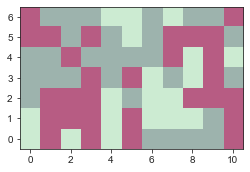

In [76]:
name = 'generated_example_zoom'

colors =['#b75c83', '#ccebd2','#9db3ad']
success_palette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(4,6))


levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

plt.imshow(np.reshape(values, (number_of_columns, number_of_rows)), cmap=cmap, norm=norm)
#plt.axis((-.5,5.5,-.5,3.5))
plt.axis((-.5,10.5,-.5,6.5))
plt.savefig(path + name + extension, dpi=400)

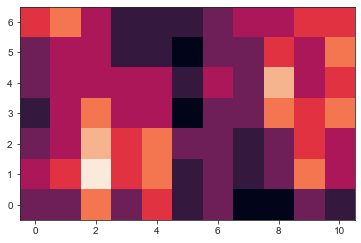

In [78]:
name = 'generated_example_weights'


image = np.reshape(densities, (number_of_columns, number_of_rows))
plt.imshow(image)


#plt.legend()
plt.axis((-.5,10.5,-.5,6.5))
#plt.colorbar(im)

#ax = fig.add_subplot(111)
#for (j,i),label in np.ndenumerate(image):
#    ax1.text(i,j,label,ha='center',va='center')
#    ax2.text(i,j,label,ha='center',va='center')
plt.savefig(path + name + extension, dpi=400)

## attempt to add numbers

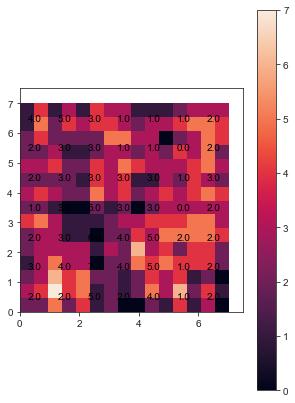

In [140]:
size = 7
data = np.arange(size * size).reshape((size, size))
values = np.random.rand(size, size)


#plt.axis((0,15,0,15))


# Limits for the extent
x_start = 0
x_end = 7
y_start = 0
y_end = 7

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(5, 7))
ax = fig.add_subplot(111)
im = ax.imshow(image, extent=extent, origin='lower', interpolation='None')

    
# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = image[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_x, text_y, label, color='black', ha='center', va='center')

fig.colorbar(im)

plt.axis((0,7.5,0,7.5))
plt.show()